<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/ONE_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



import pickle

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [55]:
rl = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/emp_automovel.csv'
dados = pd.read_csv(url)

In [56]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [58]:
colunas = dados.columns.tolist()
col_categoricas = dados.select_dtypes(include=['object']).columns.tolist()
col_numericas = dados.select_dtypes(include=['number']).columns.tolist()
col_alvo='inadimplente'
colunas.remove(col_alvo)
print (col_categoricas)
print (col_numericas)

[]
['receita_cliente', 'anuidade_emprestimo', 'anos_casa_propria', 'telefone_trab', 'avaliacao_cidade', 'score_1', 'score_2', 'score_3', 'score_social', 'troca_telefone', 'inadimplente']


In [65]:
x = dados.drop(col_alvo, axis=1)
y = dados[col_alvo]

## Árvore de Decisão


In [60]:
# Testando com todos os dados
tree = DecisionTreeClassifier()
tree.fit(x, y)
tree.score(x, y)

1.0

In [61]:
print(f'Acurácia no conjunto completo  : {tree.score(x, y)*100:.4f}%')


Acurácia no conjunto completo  : 100.0000%


Separação entre Treino, Validação e Teste

In [66]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [67]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print(f'Acurácia no conjunto de treino : {tree.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {tree.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 100.0000%
Acurácia no conjunto de valid  : 84.7661%


In [69]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)
print(f'Acurácia no conjunto de treino : {tree.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {tree.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 92.0587%
Acurácia no conjunto de valid  : 90.5932%


##Fazendo uma Matriz de Confusão

In [71]:
y_previsto = tree.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10361   118]
 [  962    40]]


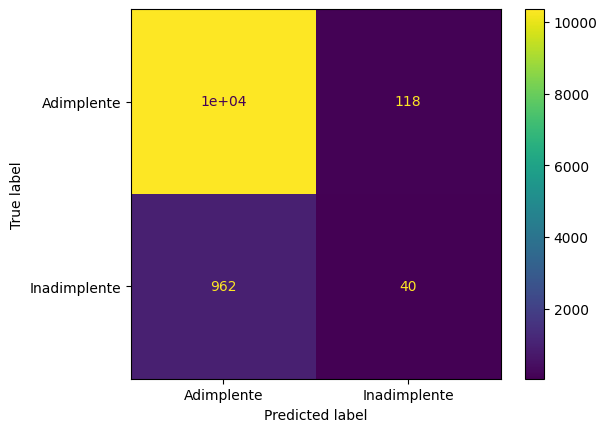

In [74]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Adimplente','Inadimplente'])
visualizacao.plot();


O modelo está performando com boa acurácia para os Adimplentes, mas está muito mal para os inadimplentes com apenas 40 acertos em 1002

### Random Forest

In [78]:
modelo_rf = RandomForestClassifier(max_depth = 10)
modelo_rf.fit(x_train, y_train)
print(f'Acurácia no conjunto de treino : {modelo_rf.score(x_train, y_train)*100:.4f}%')
print(f'Acurácia no conjunto de valid  : {modelo_rf.score(x_val, y_val)*100:.4f}%')

Acurácia no conjunto de treino : 91.5563%
Acurácia no conjunto de valid  : 91.2812%


In [79]:
y_previsto_rf = modelo_rf.predict(x_val)
matriz_confusao_rf = confusion_matrix(y_val, y_previsto_rf)
print(matriz_confusao_rf)

[[10477     2]
 [  999     3]]


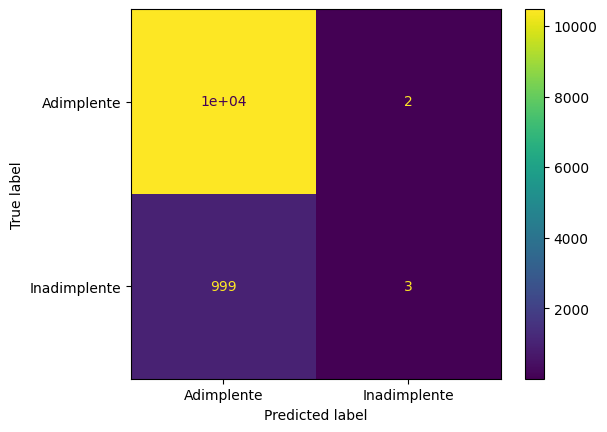

In [80]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_rf, display_labels=['Adimplente','Inadimplente'])
visualizacao.plot();